### Notebook for running pipeline in Colab

If you're running on colab: run these cells first!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/BEP/git/GPT-DT
!git status
!git pull
# Choose branch name here:
!git checkout evaluation-loop

In [ ]:
%pip install -r requirements-colab.txt

In [ ]:
# CLICK RESTART RUNTIME AND THEN RUN THIS CELL
%cd /content/drive/MyDrive/BEP/git/GPT-DT

### Main Code

In [6]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
from main import *


image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\Vraag 37.jpg: 480x640 1 outside-view, 1 speed, 287.4ms
Speed: 8.1ms preprocess, 287.4ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


1/1 [==============================] - 0s 290ms/step
not braking
1/1 [==============================] - 0s 258ms/step
not braking


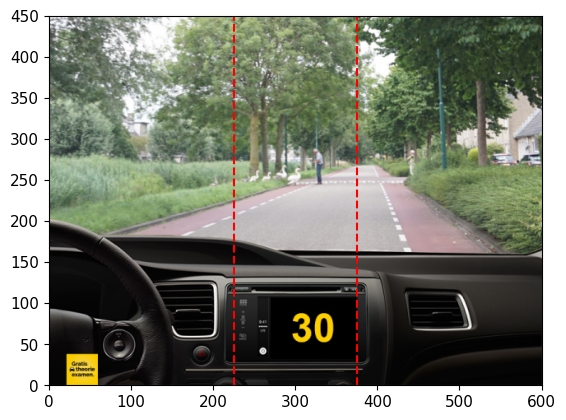

Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a residential road at 30 km/h. The weather condition is rainy weather.
        This is your front view; You see the following cars: A car 44.0 meters infront of you and to your right, A car 43.0 meters infront of you and to your right. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: There are no pedestrians in sight. You see the following bicyclist: There are no bicycles in sight. Additionally, you see: there are no more objects than the ones mentioned above.
        This is your rear view: You see the following: There are no significant objects behind you.
        """
        Give your answer in one letter, after which you should provide thorough reasoning.
  

In [8]:
image = "vraag 37.jpg"
prompt, response, car_speed = run_program(image)

In [9]:
response

' B\nReasoning: Since there are no traffic signs, traffic lights, pedestrians, or bicycles in sight, it is safe to let go of the accelerator and maintain the speed of 30 km/h. This will ensure that you are driving safely and not exceeding the speed limit.'

In [3]:
truth = pd.read_csv("ground-truth.csv")
results = truth.copy(deep = True)
results["Answer(word)"] = None
results["Answer(letter)"] = None
results["Speed"] = None

In [4]:
truth.head()

,Filename,Answer(letter),Answer(word),Speed
0,vraag 1.jpg,A,Brake,40
1,vraag 2.jpg,A,Brake,80
2,vraag 3.jpg,B,Release Accelerator,25
3,vraag 4.jpg,A,Brake,40
4,vraag 5.jpg,C,Nothing,30


In [5]:
# len(truth.index)

for row in range(0,10):
    tru_row = truth.loc[row]
    res_row = results.loc[row]

    image = tru_row["Filename"]
    prompt, response, car_speed = run_program(image)
    resp_char = response.strip(' \n\t')[0]

    if resp_char == 'A':
        resp_word = "Brake"
    elif resp_char == 'B':
        resp_word = "Release Accelerator"
    elif resp_char == 'C':
        resp_word = "Nothing"
    else:
        resp_word = "unknown"

    res_row["Answer(letter)"] = resp_char
    res_row["Speed"] = car_speed
    res_row["Answer(word)"] = resp_word





image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 1.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 138.1ms
Speed: 3.0ms preprocess, 138.1ms inference, 13.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


1/1 [==============================] - 0s 353ms/step
braking
1/1 [==============================] - 0s 132ms/step
braking
1/1 [==============================] - 0s 123ms/step
not braking
1/1 [==============================] - 0s 145ms/step
not braking



image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 2.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 102.9ms
Speed: 1.0ms preprocess, 102.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a urban road at 40 km/h. The weather condition is sunny weather.
        This is your front view; You see the following cars: A car approaching from 17.0 meters infront of you and to your left, A car 21.0 meters infront of you and to your left, A car approaching from 32.0 meters directly infront of you, A car approaching from 24.0 meters infront of you and to your left, A car approaching from 29.0 meters infront of you and to your left, A car approaching from 32.0 meters directly infront of you, A car approaching from 59.0 meters directly infront of you. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: A person 14.0 meters infront of you and to your left. You se

Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a highway at 80 km/h. The weather condition is sunny weather.
        This is your front view; You see the following cars: A car 17.0 meters infront of you and to your left, A car 18.0 meters infront of you and to your left. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: There are no pedestrians in sight. You see the following bicyclist: There are no bicycles in sight. Additionally, you see: A truck 33.0 meters infront of you and to your left , A truck 14.0 meters infront of you and to your right .
        This is your rear view: You see the following: A car closely behind you.
        """
        Give your answer in one letter, after which you should provide 

image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 3.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 203.8ms
Speed: 29.3ms preprocess, 203.8ms inference, 21.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict



Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a provincial road at 25 km/h. The weather condition is snowy weather.
        This is your front view; You see the following cars: There are no cars in sight. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: There are no pedestrians in sight. You see the following bicyclist: There are no bicycles in sight. Additionally, you see: A truck 17.0 meters directly infront of you .
        This is your rear view: You see the following: There are no significant objects behind you.
        """
        Give your answer in one letter, after which you should provide thorough reasoning.
        
        Letter:
 B
Reasoning: Since there are no cars, traffic signs, traffic lig

image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 4.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 156.4ms
Speed: 1.0ms preprocess, 156.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


1/1 [==============================] - 0s 181ms/step
not braking
1/1 [==============================] - 0s 175ms/step
not braking
1/1 [==============================] - 0s 169ms/step
braking
1/1 [==============================] - 0s 180ms/step
not braking
1/1 [==============================] - 0s 141ms/step
not braking
1/1 [==============================] - 0s 129ms/step
not braking
1/1 [==============================] - 0s 157ms/step
not braking
1/1 [==============================] - 0s 122ms/step
not braking
1/1 [==============================] - 0s 137ms/step
not braking



image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 5.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 118.6ms
Speed: 1.0ms preprocess, 118.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a urban road at 40 km/h. The weather condition is rainy weather.
        This is your front view; You see the following cars: A car approaching from 20.0 meters infront of you and to your left, A car 41.0 meters directly infront of you, A car 32.0 meters directly infront of you, A car 15.0 meters infront of you and to your right, A car 24.0 meters directly infront of you, A car 6.0 meters infront of you and to your right, A car 61.0 meters directly infront of you, A car 19.0 meters directly infront of you, A car 49.0 meters directly infront of you, A car approaching from 20.0 meters infront of you and to your left. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians


image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 6.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 119.2ms
Speed: 1.0ms preprocess, 119.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a urban road at 30 km/h. The weather condition is rainy weather.
        This is your front view; You see the following cars: A car 32.0 meters infront of you and to your left, A car approaching from 34.0 meters infront of you and to your left, A car approaching from 27.0 meters infront of you and to your left, A car approaching from 31.0 meters infront of you and to your left, A car 56.0 meters infront of you and to your left, A car approaching from 41.0 meters infront of you and to your left, A car 58.0 meters infront of you and to your left, A car approaching from 38.0 meters infront of you and to your left. You see the following traffic signs: A "Priority road" traffic sign. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: There a

Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a residential road at 40 km/h. The weather condition is overcast weather.
        This is your front view; You see the following cars: A car 16.0 meters infront of you and to your right. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: There are no pedestrians in sight. You see the following bicyclist: There are no bicycles in sight. Additionally, you see: A truck 40.0 meters directly infront of you .
        This is your rear view: You see the following: There are no significant objects behind you.
        """
        Give your answer in one letter, after which you should provide thorough reasoning.
        
        Letter:
 A
Reasoning: Since there are no traf

image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 7.jpg: 384x640 1 outside-view, 1 speed, 183.6ms
Speed: 2.0ms preprocess, 183.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


1/1 [==============================] - 0s 183ms/step
not braking



image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 8.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 148.8ms


Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a highway at 100 km/h. The weather condition is rainy weather.
        This is your front view; You see the following cars: A car 52.0 meters directly infront of you. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: There are no pedestrians in sight. You see the following bicyclist: There are no bicycles in sight. Additionally, you see: there are no more objects than the ones mentioned above.
        This is your rear view: You see the following: There are no significant objects behind you.
        """
        Give your answer in one letter, after which you should provide thorough reasoning.
        
        Letter:
 A
Reasoning: Since there are no traffic signs

Speed: 1.0ms preprocess, 148.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


1/1 [==============================] - 0s 253ms/step
not braking


Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a urban road at 30 km/h. The weather condition is sunny weather.
        This is your front view; You see the following cars: A car 28.0 meters infront of you and to your left, A car approaching from 23.0 meters infront of you and to your left, A car 27.0 meters infront of you and to your left, A car 30.0 meters infront of you and to your left, A car approaching from 41.0 meters infront of you and to your left, A car 24.0 meters infront of you and to your left, A car approaching from 30.0 meters infront of you and to your left, A car 29.0 meters directly infront of you. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: A person 24.0 meters directly infront of you

image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 9.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 159.6ms
Speed: 5.0ms preprocess, 159.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


1/1 [==============================] - 0s 163ms/step
not braking
1/1 [==============================] - 0s 195ms/step
not braking



image 1/1 C:\Users\Martijn\Desktop\coding-projects\BEP\GPT-DT\images\vraag 10.jpg: 384x640 1 outside-view, 1 rear-view, 1 speed, 117.0ms


Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a highway at 100 km/h. The weather condition is rainy weather.
        This is your front view; You see the following cars: A car 10.0 meters infront of you and to your left, A car 46.0 meters directly infront of you. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: There are no pedestrians in sight. You see the following bicyclist: There are no bicycles in sight. Additionally, you see: A truck 27.0 meters directly infront of you , A bus 18.0 meters infront of you and to your left , A truck 10.0 meters infront of you and to your left .
        This is your rear view: You see the following: There are no significant objects behind you.
        """
        Give you

Speed: 2.0ms preprocess, 117.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to tri-crop\predict


Choose to A) Brake B) Let go of the accelerator or C) Do Nothing based on the given context.

        Context: 
        """
        Assume you are driving in The Netherlands. You are driving in a residential road at 30 km/h. The weather condition is sunny weather.
        This is your front view; You see the following cars: There are no cars in sight. You see the following traffic signs: There are no traffic signs in sight. You see the following traffic lights: There are no traffic lights in sight. You see the following pedestrians: A person 17.0 meters infront of you and to your left. You see the following bicyclist: There are no bicycles in sight. Additionally, you see: A motorcycle 17.0 meters infront of you and to your left .
        This is your rear view: You see the following: There are no significant objects behind you.
        """
        Give your answer in one letter, after which you should provide thorough reasoning.
        
        Letter:
 B
Reasoning: Since there are no

In [4]:
temp_result_copy = results.head(11).copy

In [8]:
results.head(10)

,Filename,Answer(letter),Answer(word),Speed
0,vraag 1.jpg,B,Release Accelerator,40
1,vraag 2.jpg,B,Release Accelerator,80
2,vraag 3.jpg,B,Release Accelerator,25
3,vraag 4.jpg,B,Release Accelerator,40
4,vraag 5.jpg,B,Release Accelerator,30
5,vraag 6.jpg,A,Brake,40
6,vraag 7.jpg,A,Brake,100
7,vraag 8.jpg,B,Release Accelerator,30
8,vraag 9.jpg,B,Release Accelerator,100
9,vraag 10.jpg,B,Release Accelerator,30


In [12]:
a = confusion_matrix(truth.head(10)[["Answer(letter)"]],results.head(10)[["Answer(letter)"]])
sn.heatmap(a, annot=True, cmap="rocket")
plt.show()

In [13]:
a

array([[0, 4, 0],
       [2, 2, 0],
       [0, 2, 0]], dtype=int64)